Практическая работа №5

Выполнил: Студент группы ББМО-01-23 Бакин Д.И.


In [ ]:
!pip install scrapy
!scrapy startproject spider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 6.1 MB/s eta 0:00:00
New Scrapy project 'spider', using template directory '/usr/local/lib/python3.10/dist-packages/scrapy/templates/project', created in:
    /content/spider

You can start your first spider with:
    cd spider
    scrapy genspider example example.com


In [ ]:
%%writefile spider/spider/spiders/spider.py
import scrapy

class QuoteSpider(scrapy.Spider):
    name = 'spider'
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {
                'text': quote.css('span.text::text').get(),
                'author': quote.css('span small::text').get(),
                'tags': quote.css('div.tags a.tag::text').getall(),
            }

        yield from response.follow_all(css='li.next a', callback=self.parse)

Writing spider/spider/spiders/spider.py


In [ ]:
!cd spider && scrapy crawl spider -o bakin.json

2024-05-21 10:56:33 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: spider)
2024-05-21 10:56:33 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.1.2, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.1 30 Jan 2024), cryptography 42.0.7, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2024-05-21 10:56:33 [scrapy.addons] INFO: Enabled addons:
[]
2024-05-21 10:56:33 [asyncio] DEBUG: Using selector: EpollSelector
2024-05-21 10:56:33 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2024-05-21 10:56:33 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2024-05-21 10:56:33 [scrapy.extensions.telnet] INFO: Telnet Password: 1a3e8124a743edf3
2024-05-21 10:56:33 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scra

In [ ]:
import pandas as pd

df = pd.read_json('/content/spider/bakin.json')

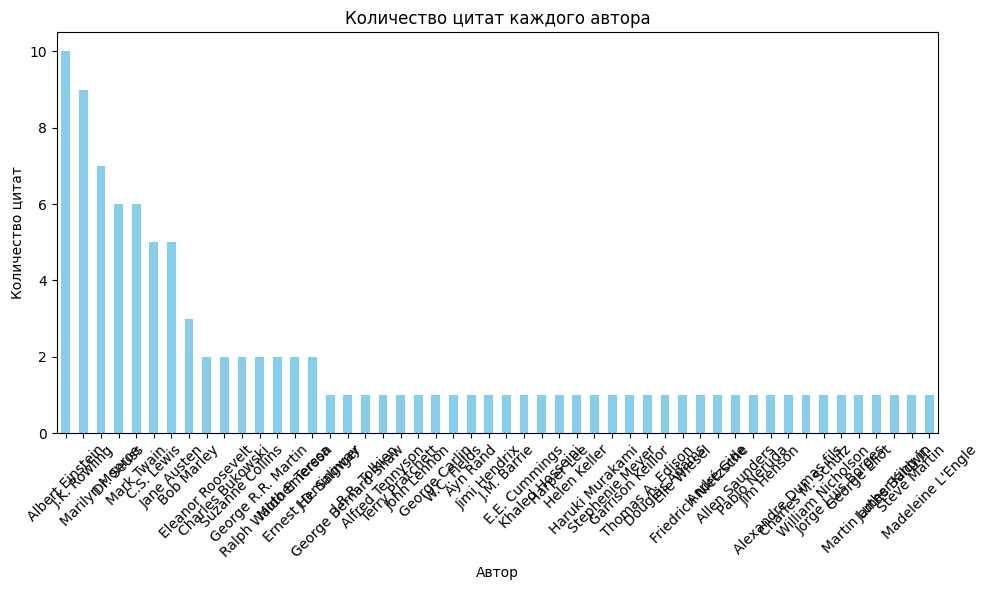

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_json('/content/spider/bakin.json')


# Визуализация
plt.figure(figsize=(10,6))
author_counts.plot(kind='bar', color='skyblue')
plt.title('Количество цитат каждого автора')
plt.xlabel('Автор')
plt.ylabel('Количество цитат')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


